<a href="https://colab.research.google.com/github/vjrdy/ReccomenderSystems-Goodreads/blob/master/RecommenderSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goodreads book recommender systems by Neural Networks
***First Go to Runtime and  change the runtime type to GPU.***


<br>
 Copyright:  Vijay YERUVA 
<br>
 Email: vijay.yeruva@epita.fr
<br>
 UID: #20527




### Option 3 : DL model 

# Theory explanation

**Recommender systems is a field of is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.**

Recommender systems usually make use of either or both collaborative filtering and content-based filtering (also known as the personality-based approach), as well as other systems such as knowledge-based systems. Collaborative filtering approaches build a model from a user's past behavior (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in.Content-based filtering approaches utilize a series of discrete, pre-tagged characteristics of an item in order to recommend additional items with similar properties.Current recommender systems typically combine one or more approaches into a hybrid system.


**Steps**



**Data Collection**

Parallel corpus is collected from various sources. It is possible to collect news texts, drama / movie subtitles, Wikipedia, etc., as well as data sets for evaluation of translation systems disclosed by WMT, a machine translation competition, and use them in translation systems.


**Le mot propre**

The collected data must be refined. The refinement process includes sorting sentences by corpus in both languages, and eliminating noise such as special characters.


**Train**

Train the seq2seq model using prepared datasets. Depending on the amount, you can train with a single GPU, or use multiple GPUs in parallel to reduce training time.


**Visualize**

Now that the model has been created, you can start translating.


**Evaluating**



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving books.csv to books.csv
Saving ratings.csv to ratings.csv


In [0]:
ratings_df = pd.read_csv('ratings.csv')
books_df = pd.read_csv('books.csv')

In [0]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings_df, test_size=0.2)

In [0]:
n_users = len(ratings_df.user_id.unique())
n_books = len(ratings_df.book_id.unique())

user_index = [x-1 for x in train.user_id.values]
book_index = [x-1 for x in train.book_id.values]

user_index_test = [x-1 for x in test.user_id.values]
book_index_test = [x-1 for x in test.book_id.values]

rates = train.rating.values 
rates_test = test.rating.values

num_ratings = len(rates)
num_ratings_test = len(rates_test)

In [9]:
print("Number of users : ",n_users,"\n","Number of books :",n_books)

Number of users :  53424 
 Number of books : 10000


In [10]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

n_latent_factors = 5

book_input = Input(shape=[1], name="Inputlayer-Book")
book_embedding = Embedding(n_books+1, n_latent_factors, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

user_input = Input(shape=[1], name="Inputlayer-User")
user_embedding = Embedding(n_users+1, n_latent_factors, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)


Using TensorFlow backend.
W0724 09:11:16.195019 140295811020672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 09:11:16.245787 140295811020672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 09:11:16.306934 140295811020672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputlayer-Book (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Inputlayer-User (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Book-Embedding (Embedding)      (None, 1, 5)         50005       Inputlayer-Book[0][0]            
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         267125      Inputlayer-User[0][0]            
__________________________________________________________________________________________________
Flatten-Bo

In [0]:
# Define accuracy
threshold = 1.0

def accuracy(desired_rates, predicted_rates):
    diff_op = tf.subtract(predicted_rates, desired_rates, name='trainig_diff')
    # Just measure the absolute difference against the threshold
    good = tf.less(tf.abs(diff_op), threshold)

    return tf.reduce_mean(tf.cast(good, tf.float32))


In [13]:
model.compile('adam', 'mean_squared_error',metrics=['accuracy'])

W0724 09:11:42.842612 140295811020672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1, validation_split=0.1)

Train on 706863 samples, validate on 78541 samples
Epoch 1/10
706863/706863 [==============================] - 104s 147us/step - loss: 0.6579 - acc: 0.5242 - val_loss: 0.9906 - val_acc: 0.4537
Epoch 2/10
706863/706863 [==============================] - 106s 150us/step - loss: 0.6439 - acc: 0.5297 - val_loss: 0.9747 - val_acc: 0.4546
Epoch 3/10
640128/706863 [==========================>...] - ETA: 10s - loss: 0.6288 - acc: 0.5361

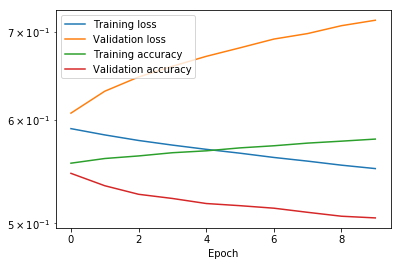

In [0]:
def plot_history(history):
    pd.Series(history.history['loss']).plot(logy=True, label='Training loss')
    pd.Series(history.history['val_loss']).plot(logy=True, label='Validation loss')
    
    pd.Series(history.history['acc']).plot(logy=True, label='Training accuracy')
    pd.Series(history.history['val_acc']).plot(logy=True, label='Validation accuracy')
    plt.legend()

    plt.xlabel("Epoch")

    plt.show()
    
plot_history(history)

In [0]:
# Visualizing the embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]
book_em_weights.shape

(10001, 5)

In [0]:
#Normalizing the similarity
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0000001

Manifold Embeddings

PCA : Reduces the dimensions and can capture the greatest amount of variance in the data.

TSNE: t-Stochastic Distributed Neighbors Embedding is a method that use the idea of a manifold to map vecotrs to a lower dimensional embedded space.The primary idea behind dimension reduction with a manifold is that there is a lower dimensional representation of the vectors that can still capture the variation between different groups.

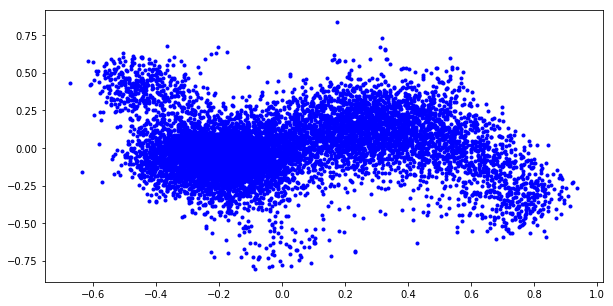

In [0]:
from sklearn.decomposition import PCA
import seaborn as sns
plt.figure(figsize=(10, 5))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
plt.plot(pca_result[:,0],pca_result[:,1],'b.')

In [0]:
from sklearn.manifold import TSNE
import umap as um

def reduce_dim(weights, components = 3, method = 'tsne'):
#Reduce dimensions of embeddings
    return TSNE(components, metric = 'cosine').fit_transform(weights)
    
    
book_r = reduce_dim(book_em_weights, components = 2, method = 'tsne')
book_r.shape   

(10001, 2)

Text(0.5, 1.0, 'Book Embeddings Visualized with TSNE')

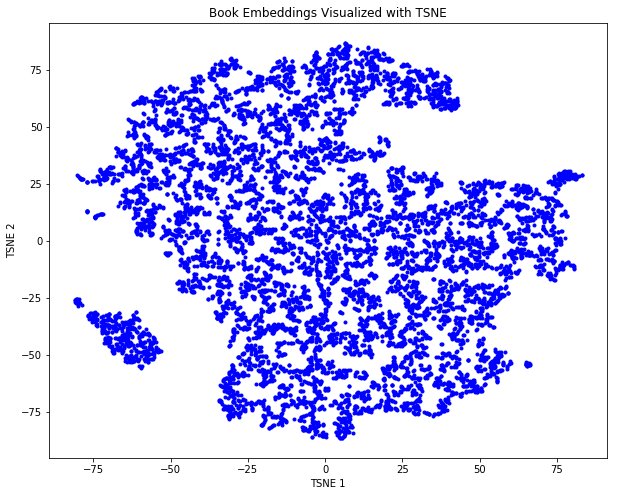

In [0]:
plt.figure(figsize = (10, 8))
plt.plot(book_r[:, 0], book_r[:, 1], 'b.')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Book Embeddings Visualized with TSNE')

In [0]:
# Creating dataset for making recommendations with the given user ID
def get_recommendations(user_id):
    book_data = np.array(list(set(dataset.book_id)))
    user = np.array([user_id for i in range(len(book_data))])
    predictions = model.predict([user, book_data])
    predictions = np.array([a[0] for a in predictions])
    recommended_book_ids = (-predictions).argsort()[:5]
    return recommended_book_ids

In [0]:
#Get recommendations for 10th user
recommended_bookids = get_recommendations(10)
print("Recommended book id ",recommended_book_ids)

Recommended book id  [6088 7830 5989 9569 8208]


In [0]:
print(books_df[books_df['id'].isin(recommended_book_ids)])

        id   book_id  best_book_id   work_id  books_count        isbn  \
5988  5989   3697927       3697927   3741438           10  1599903229   
6087  6088  15808287      15808287  21532921           13   525953612   
7829  7830     41704         41704     41240           53   743449673   
8207  8208   9815702       9815702  14706158           21   451234863   
9568  9569  32075671      32075671  49638190           36    62498533   

            isbn13              authors  original_publication_year  \
5988  9.781600e+12   Jessica Day George                     2009.0   
6087  9.780526e+12  Jennifer Chiaverini                     2013.0   
7829  9.780743e+12        Clive Cussler                     1996.0   
8207  9.780451e+12          Chloe Neill                     2011.0   
9568  9.780062e+12         Angie Thomas                     2017.0   

                             original_title  \
5988          Princess of the Midnight Ball   
6087              Mrs. Lincoln's Dressmaker   

In [0]:
# Average rating prediction on Test data 
nr_sampled_users = 10

for index in np.random.choice(range(len(user_index_test)), size=nr_sampled_users):
    u = [user_index_test[index]]
    b = [book_index_test[index]]
    r = rates_test[index]

    rhat = model.predict([u, b]) 

    print ("User rating " + str(u) + " for book " + str(b) + ":" + str(r) + " predicted rating : " + str(rhat[0]))

User rating [17726] for book [5127]:4 predicted rating : [4.053815]
User rating [47410] for book [1771]:3 predicted rating : [3.4070477]
User rating [22995] for book [5262]:3 predicted rating : [2.8460002]
User rating [49242] for book [2510]:3 predicted rating : [4.3069096]
User rating [13012] for book [1851]:4 predicted rating : [1.2712445]
User rating [17029] for book [5867]:4 predicted rating : [3.6155398]
User rating [2887] for book [6322]:5 predicted rating : [0.06019549]
User rating [36721] for book [4551]:5 predicted rating : [3.741144]
User rating [24714] for book [4809]:4 predicted rating : [3.5801613]
User rating [39774] for book [1055]:5 predicted rating : [2.6308439]


In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def compute_error(model, user_index_test, book_index_test):
    ypred = model.predict([user_index_test, book_index_test])
    mae = mean_absolute_error(rates_test, ypred)
    rmse = np.sqrt(mean_squared_error(rates_test,ypred))
    return mae,rmse

mae,rmse = compute_error(model, user_index_test, book_index_test)
print("Mean absolute error on the test set: {}".format(mae))
print("Root Mean squared error on the test set: {}".format(rmse))


Mean absolute error on the test set: 1.2494949099045851
Root Mean squared error on the test set: 1.585440736030337


In [0]:
def create_recommendations(model, df, listOfUsers, nrRecommendations=10):
    
    book_index = np.array(np.unique(df.book_id.values))-1
    recommendations_set = {}
    
    for user in listOfUsers:
        user_index = np.ones(len(book_index)) * user
        predicted_rates = model.predict([user_index, book_index])
        
        ranked_books_idx = np.argsort(predicted_rates, axis=0)[::-1].squeeze()
        ranked_books = book_index[ranked_books_idx] 
        recommendations_set[user] = ranked_books[:nrRecommendations]
        
    return recommendations_set



In [0]:
recommendations_set = create_recommendations(model,test,range(10))
print(recommendations_set)

{0: array([467, 131, 959, 146, 213,   7, 177, 436,   5,  28], dtype=int64), 1: array([6089, 7831, 5990, 9967, 7937, 2033, 8209, 7823, 9570, 5046],
      dtype=int64), 2: array([7831, 6089, 5990, 9967, 9570, 8209, 1647, 2292, 7937, 7823],
      dtype=int64), 3: array([7937, 9318, 7063, 5046, 8978, 7217, 6361, 8321, 7254, 6583],
      dtype=int64), 4: array([7639,  466, 8202, 1340, 2485, 1450,  137,  599, 6312, 2894],
      dtype=int64), 5: array([7831, 5990, 6089, 7823, 9967, 9570, 8209, 7937, 9842, 1647],
      dtype=int64), 6: array([7831, 6089, 5990, 7823, 9967, 2033, 9570, 8209, 7937, 1647],
      dtype=int64), 7: array([8589, 7661, 8650, 8999, 9318, 9561, 8233,    4,   63, 5116],
      dtype=int64), 8: array([7639, 9318, 8794, 9316, 9339, 9824, 7483, 7153, 4990, 6312],
      dtype=int64), 9: array([7831, 7937, 5990, 6089, 7823, 9842, 8209, 9076, 9570, 5046],
      dtype=int64)}


In [0]:
def create_validation_set(df, minRate=3.5, k=5):
    validation_set = {}
    
    for user in np.unique(df['user_id'].values) - 1:
        rated_books = df[df['user_id'] == user]['book_id'].values -1
        rates = df[df['user_id'] == user]['rating'].values

        best_ranked_books = rated_books[np.where(rates > minRate)[0]]
        if len(best_ranked_books) >= k:
            validation_set[user] = best_ranked_books
            
    return validation_set



def precisionAtK(validations_set, recommendations_set, k=5):
    
    res = []
    for user in validations_set.keys():
        
        v = validations_set[user]
        r = recommendations_set[user][:k]
        
        ans = len(np.intersect1d(v, r)) / k
        res.append(ans)

    return np.mean(res)


def compute_precisionAtK_from_recommendations(model, df_test, validation_set=None, nrRecommendations=20, k=10):
#Compute precisionAtK from recommendations and validation set. Generate recommendations applying 'model' to dataset 'df_test'.
     
    
    if validation_set is None:
        validation_set = create_validation_set(df_test, minRate=3.5, k=k)
        
    recommendations_set = create_recommendations(model, df_test,validation_set.keys(), nrRecommendations=nrRecommendations)
    precision = precisionAtK(validation_set, recommendations_set, k=k)
    
    return precision


In [0]:
validation_set = create_validation_set(test, minRate=3.5, k=5)

In [0]:
precision = compute_precisionAtK_from_recommendations(model, test, validation_set=validation_set,nrRecommendations=20, k=k)
print("MF: Precision@{} is {}".format(k, precision))

NameError: name 'numpy' is not defined